In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#normalizing and reshaping the dataset:
x_train=x_train.reshape(-1,28,28,1).astype('float32')/255
x_test=x_test.reshape(-1,28,28,1).astype('float32')/255

#defining cnn model
model=keras.Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dense(10,activation='softmax')
])

#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#train the model
model.fit(x_train,y_train,epochs=10,batch_size=32)

#evaluate the model:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test accuracy:',test_acc)



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.8269 - loss: 0.4890
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.8979 - loss: 0.2801
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.9133 - loss: 0.2348
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.9214 - loss: 0.2067
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.9329 - loss: 0.1812
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.9378 - loss: 0.1667
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.9469 - loss: 0.1413
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.9515 - loss: 0.1300
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.9586 - loss: 0.1106
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.9647 - loss: 0.0961
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8613 - loss: 0.5859
Test accuracy: 0.861299

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


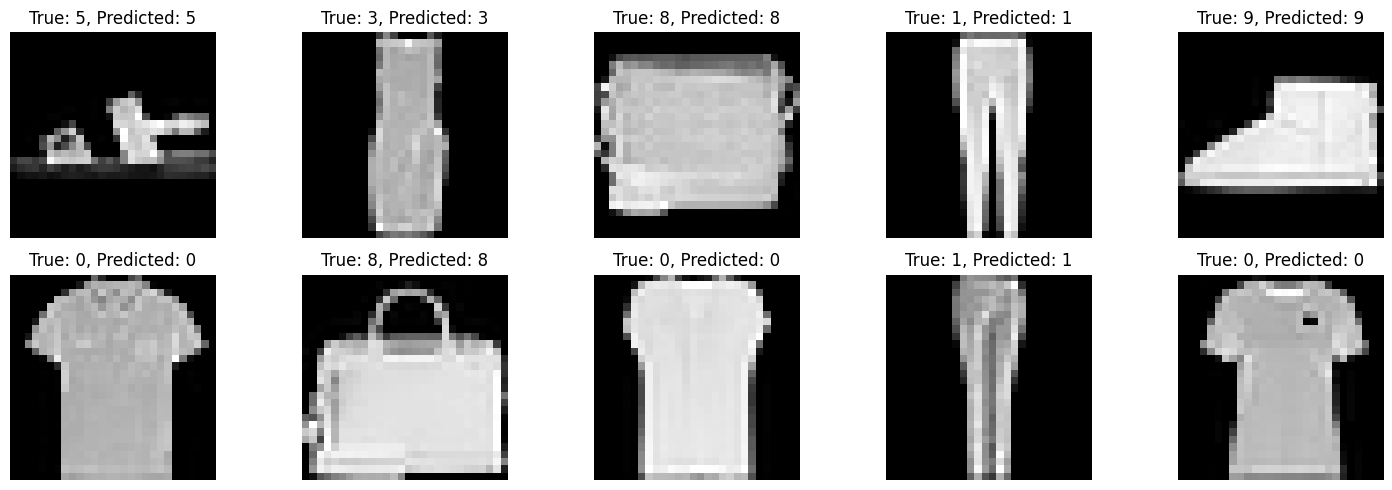

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
sample=10
sample_indices = np.random.choice(len(x_test), sample, replace=False)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]


# Predict the labels for the sample images
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Display the images and predictions
plt.figure(figsize=(15, 5))
for i in range(sample):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28,28), cmap='gray') # Reshape for display
    plt.title(f"True: {sample_labels[i]}, Predicted: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()